- Week Six - Assignment Data Sets
- DATA 620
- Shri Tripathi

In [56]:
%matplotlib inline

**Davis Southern Club Women**

This dataset demonstrates how to create unipartite projections of a bipartite graph and analyze their properties. Collected by Davis et al. in the 1930s, the data records 18 Southern women’s attendance at 14 social events. The graph is bipartite, connecting clubs and women.

In [57]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
from prettytable import PrettyTable
import networkx.algorithms.bipartite as bipartite

# Load the Davis Southern Women graph (bipartite):
#   - The graph connects two types of nodes: 'women' (top) and 'clubs' (bottom).
G = nx.davis_southern_women_graph()

# Separate the node sets for clarity:
women = G.graph['top']    # Set of women
clubs = G.graph['bottom'] # Set of clubs

# The following code (commented out) shows how to obtain and print
# the bipartite adjacency matrix.
# The bipartite adjacency matrix reveals which women attended which clubs/events.

# print("Biadjacency matrix")
# print(bipartite.biadjacency_matrix(G, women, clubs))

# PROJECT THE BIPARTITE GRAPH ONTO WOMEN NODES
# --------------------------------------------
# By projecting onto the women node set, we create a graph where
# women are directly connected to each other if they share at least one club.

# 1) Simple Projection (Unweighted)
# W = bipartite.projected_graph(G, women)
#
# # Print the number of direct friends (connections) each woman has
# # in the projected graph
# print('')
# print("#Friends, Member")
# for w in women:
#     print('%d %s' % (W.degree(w), w))

# 2) Weighted Projection
# In the weighted projection, edges between women are assigned a weight
# corresponding to how many clubs they share. The degree in this context
# (when using the 'weight' parameter) sums up these weights.

# W = bipartite.weighted_projected_graph(G, women)
# print('')
# print("#Friend meetings, Member")
# for w in women:
#     print('%d %s' % (W.degree(w, weight='weight'), w))

# VISUALIZE THE ORIGINAL BIPARTITE GRAPH
# nx.draw(G)
# plt.show()


In [58]:
#print("Biadjacency matrix")
#print(bipartite.biadjacency_matrix(G, women, clubs))

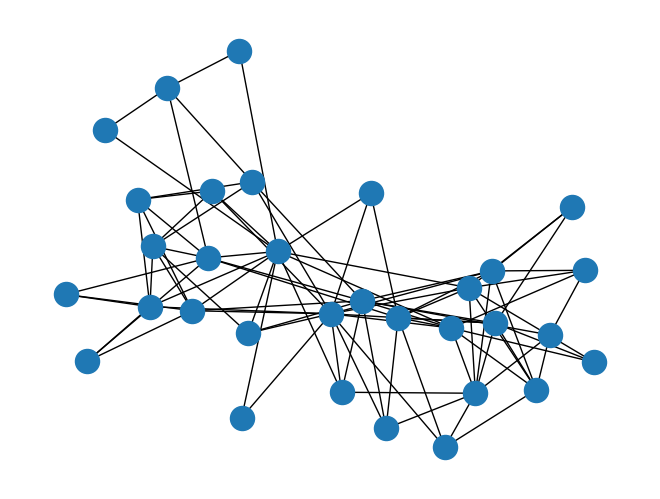

In [59]:
#plot of the entire network graph
nx.draw(G)
plt.show()

**QUESTION**

What can you infer about the relationships between (1) the women, and (2) the social events?  

**ABOUT THE NODES**

In [60]:
# Extract the two distinct sets (partitions) of nodes from the bipartite graph
# In the Davis Southern Women dataset, 'top_nodes' are women and 'bottom_nodes' are social events.
top_nodes, bottom_nodes = nx.bipartite.sets(G)

# Convert them to lists for easier iteration and indexing
women = list(top_nodes)
clubs = list(bottom_nodes)

# Print the list of women
print("\nThese are the 18 women in the graph:\n")
for woman in women:
    print(woman)



These are the 18 women in the graph:

Sylvia Avondale
Eleanor Nye
Nora Fayette
Evelyn Jefferson
Olivia Carleton
Brenda Rogers
Katherina Rogers
Frances Anderson
Theresa Anderson
Ruth DeSand
Laura Mandeville
Pearl Oglethorpe
Myra Liddel
Flora Price
Helen Lloyd
Dorothy Murchison
Verne Sanderson
Charlotte McDowd


In [61]:
clubs = list(clubs)

print("\nThese are the 14 clubs in the graph:\n")
for club in clubs:
    print(club)


These are the 14 clubs in the graph:

E9
E2
E7
E12
E3
E1
E6
E11
E8
E10
E14
E13
E5
E4


In [62]:
#All nodes and their degrees(number of connections)
all_degrees = dict(nx.degree(G))

#women_degrees = G.degree(top_nodes)
#clubs_degrees = G.degree(bottom_nodes)

print(pd.DataFrame(list(all_degrees.items())))


                    0   1
0    Evelyn Jefferson   8
1    Laura Mandeville   7
2    Theresa Anderson   8
3       Brenda Rogers   7
4    Charlotte McDowd   4
5    Frances Anderson   4
6         Eleanor Nye   4
7    Pearl Oglethorpe   3
8         Ruth DeSand   4
9     Verne Sanderson   4
10        Myra Liddel   4
11   Katherina Rogers   6
12    Sylvia Avondale   7
13       Nora Fayette   8
14        Helen Lloyd   5
15  Dorothy Murchison   2
16    Olivia Carleton   2
17        Flora Price   2
18                 E1   3
19                 E2   3
20                 E3   6
21                 E4   4
22                 E5   8
23                 E6   8
24                 E7  10
25                 E8  14
26                 E9  12
27                E10   5
28                E11   4
29                E12   6
30                E13   3
31                E14   3


In this network, the nodes with the highest number of connections are events E8, E9, and E7, with degrees of 14, 12, and 10, respectively. Additionally, several women nodes each have a degree of 8. The graph below offers a visual representation of these connections.

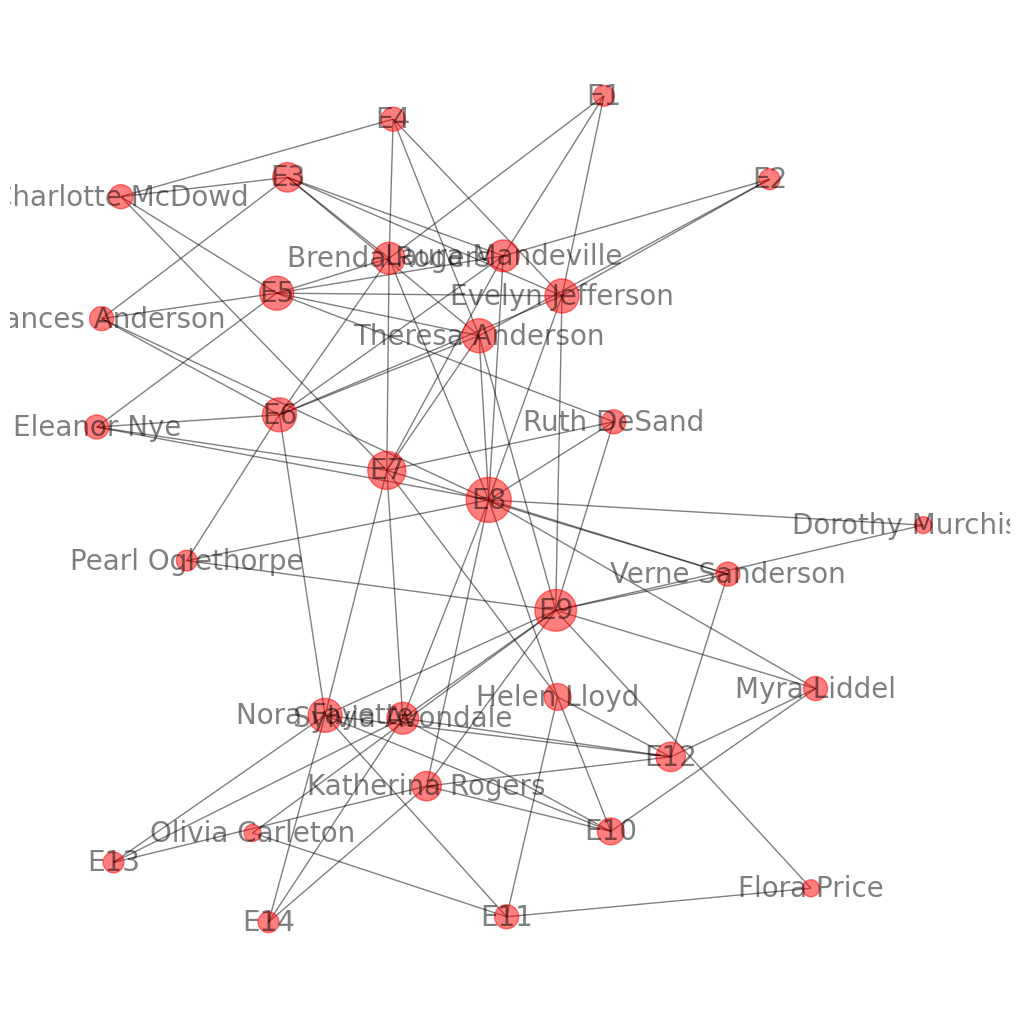

In [63]:
# Create a dictionary where each key is a node and the value is the node's degree.
d = dict(G.degree())

# Initialize a figure with a specified size (in inches).
plt.figure(figsize=(10, 10))

# Draw the graph:
#   - node_size is determined by each node's degree (multiplied by 75 for better visibility),
#   - with_labels=True ensures node labels are visible,
#   - node_color='red' sets all nodes to red,
#   - alpha=.5 makes the nodes partially transparent,
#   - font_size=20 increases label text size.
nx.draw(
    G,
    node_size=[v * 75 for v in d.values()],
    with_labels=True,
    node_color='red',
    alpha=0.5,
    font_size=20
)


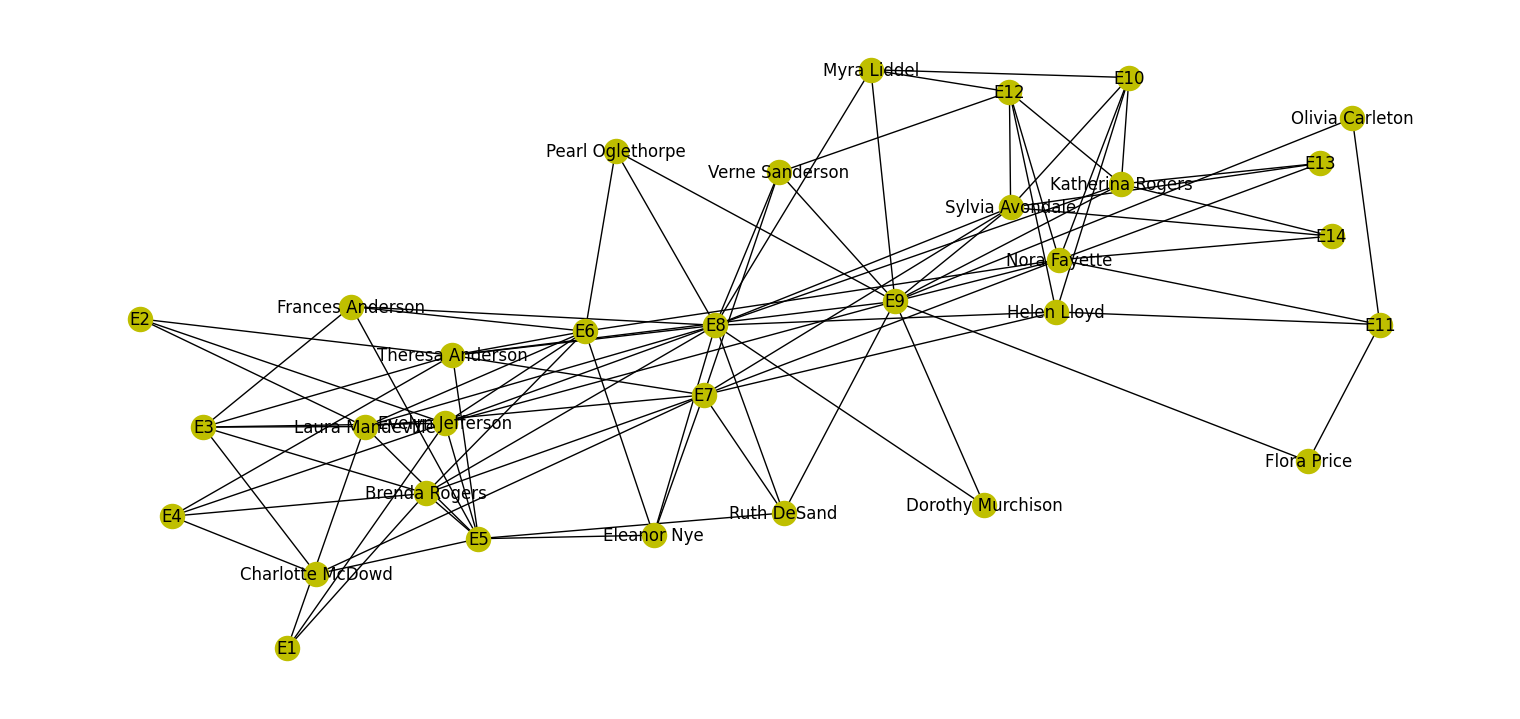

In [64]:
# Plot the bipartite graph with labels:
#   - figsize sets the dimensions of the figure.
#   - with_labels=True displays node labels.
#   - node_color="y" sets the node color to yellow.
plt.figure(figsize=(15, 7))
nx.draw(G, with_labels=True, node_color="y")


**Bipartite Projections**

The first bipartite projection will establish connections between Southern women based on their participation in the same club events, with the data stored in a Pandas DataFrame. Similarly, the second bipartite projection will create connections between club events based on shared participants, and this information will also be recorded in a Pandas DataFrame.

Women Network

In [65]:
# Project the bipartite graph onto the women nodes.
# This creates a new graph where women are connected if they attended at least one common event.
W = bipartite.projected_graph(G, women)

# Convert the degree information (number of connections each woman has) into a Pandas DataFrame.
# - `list(W.degree())` extracts each woman's name and her number of connections.
# - `columns=["Member", "#Friends"]` names the columns appropriately.
# - `sort_values('#Friends', ascending=False)` sorts the women in descending order based on their number of connections.
pd.DataFrame(list(W.degree()), columns=["Member", "#Friends"]).sort_values('#Friends', ascending=False)


,Member,#Friends
0,Sylvia Avondale,17
8,Theresa Anderson,17
16,Verne Sanderson,17
14,Helen Lloyd,17
9,Ruth DeSand,17
3,Evelyn Jefferson,17
2,Nora Fayette,17
6,Katherina Rogers,16
11,Pearl Oglethorpe,16
12,Myra Liddel,16


From the output above, Evelyn Jefferson shares connections with six other Southern women, all having the same number of mutual event connections, totaling 17. Similarly, Myra Liddel and Brenda Rogers also share connections with several other women based on mutual event participation. However, Ms. Jefferson, along with DeSand, Lloyd, Fayette, Avondale, Sanderson, and Anderson, appears to have the highest number of connections.

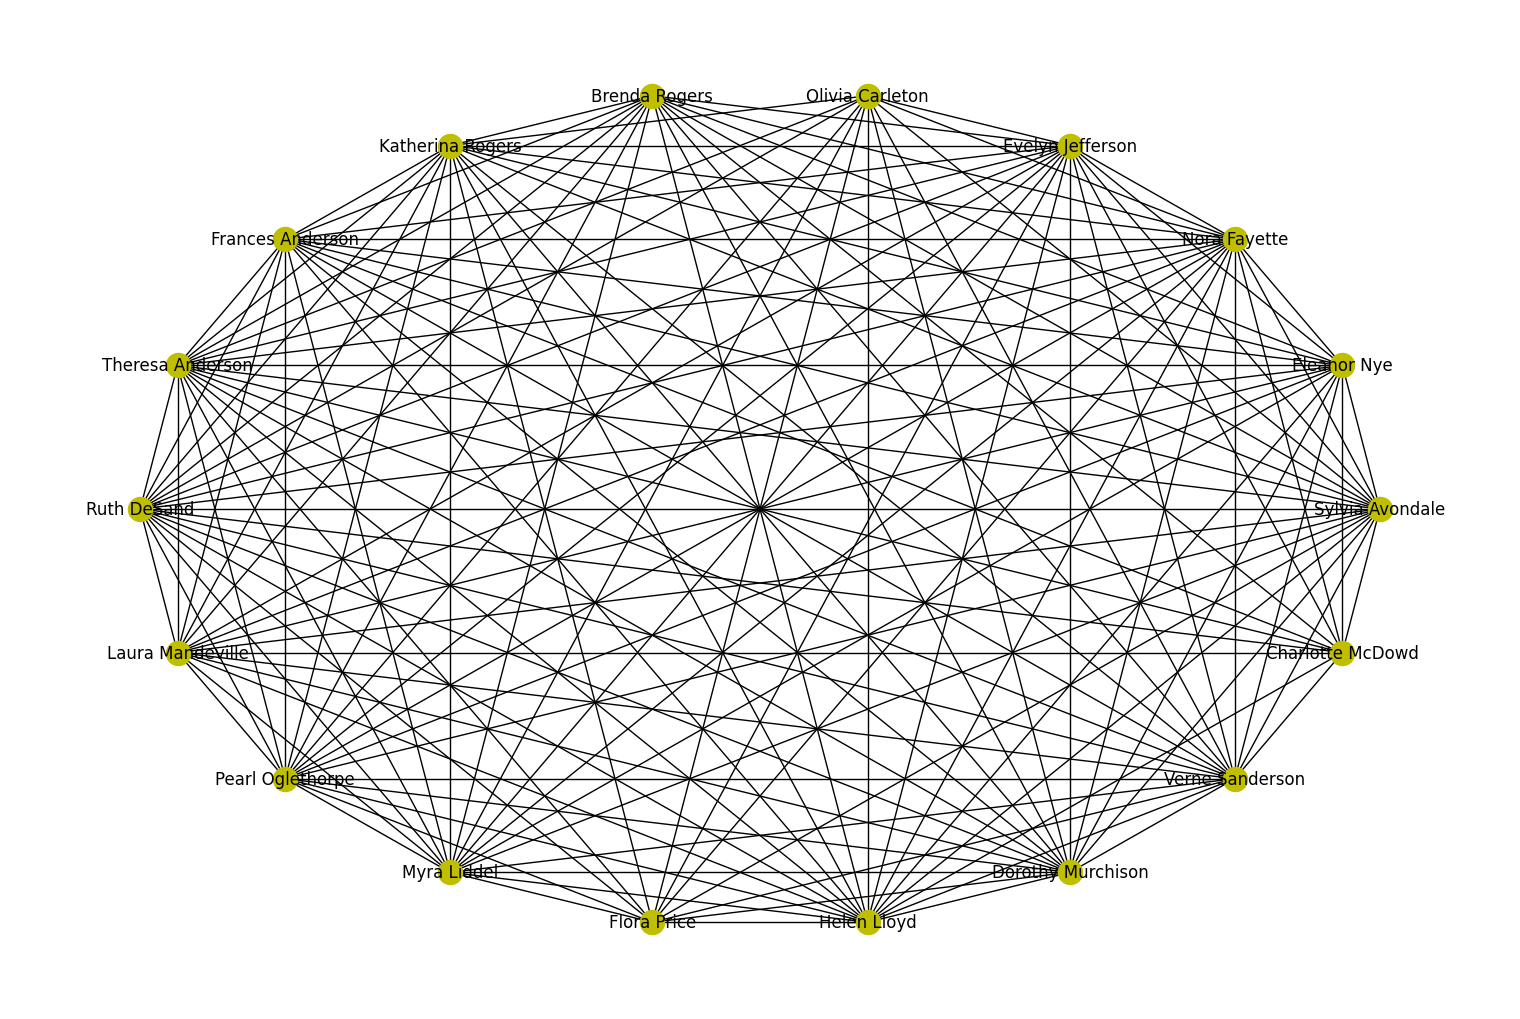

In [66]:
# Plot the network graph of the bipartite projected graph (women's projection)
# - figsize sets the figure size to 15x10 inches.
# - nx.draw_circular() arranges the nodes in a circular layout.
# - with_labels=True ensures that node labels (women's names) are displayed.
# - node_color="y" sets the node color to yellow.

plt.figure(figsize=(15, 10))
nx.draw_circular(W, with_labels=True, node_color="y")


*Weighted projected graph on women nodes*

The goal here is to retain the number of co-occurrences. The computed degree is weighted, reflecting the total number of shared contacts. This degree represents the number of meetings with friends while accounting for the connectivity of a node's neighbors. See the table below for details.

In [67]:
# Create a weighted projection of the bipartite graph onto the women nodes.
# In this weighted projection, edges between women indicate how many events they attended together.
W2 = bipartite.weighted_projected_graph(G, women)

# Convert the weighted degree information into a Pandas DataFrame.
# - `list(W2.degree(W2, weight='weight'))` extracts each woman's name and her total weighted connections.
# - `columns=["Member", "#Meetings"]` names the columns appropriately.
# - `sort_values('#Meetings', ascending=False)` sorts the women in descending order based on their total number of shared meetings.
pd.DataFrame(list(W2.degree(W2, weight='weight')), columns=["Member", "#Meetings"]).sort_values('#Meetings', ascending=False)


,Member,#Meetings
8,Theresa Anderson,57
3,Evelyn Jefferson,50
0,Sylvia Avondale,46
5,Brenda Rogers,46
10,Laura Mandeville,45
2,Nora Fayette,43
9,Ruth DeSand,40
16,Verne Sanderson,38
6,Katherina Rogers,37
1,Eleanor Nye,36


In this case, Theresa Anderson has the highest weighted degree in the projected graph. She has formed a total of 57 connections by attending eight club meetings.

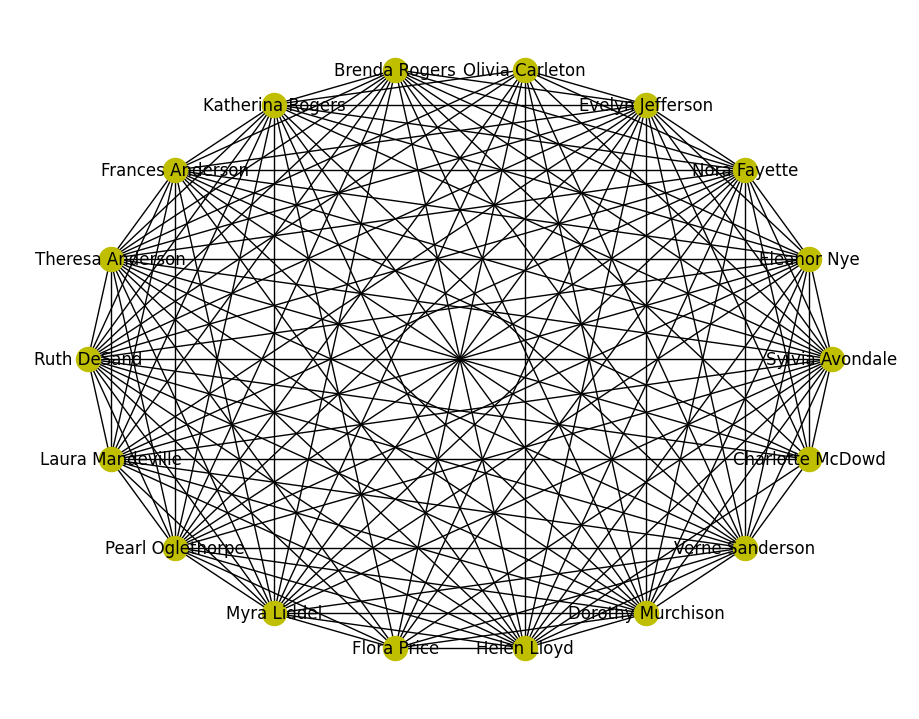

In [68]:
# Plot the network graph of the weighted bipartite projection (women's projection)
# - figsize sets the figure size to 9x7 inches.
# - nx.draw_circular() arranges the nodes in a circular layout.
# - with_labels=True ensures that node labels (women's names) are displayed.
# - node_color="y" sets the node color to yellow.

plt.figure(figsize=(9, 7))
nx.draw_circular(W2, with_labels=True, node_color="y")


**Centrality Metrics of women network**

In [69]:
# Function to compute and display centrality measures for a given graph
def PTable(graph):
    # Compute various centrality metrics
    degree = nx.degree(graph)  # Number of connections for each node
    degree_centrality = nx.degree_centrality(graph)  # Measures the importance of a node based on its degree
    betweenness_centrality = nx.betweenness_centrality(graph)  # Measures the extent to which a node lies on shortest paths
    closeness_centrality = nx.closeness_centrality(graph)  # Measures how close a node is to all others in the network
    eigenvector_centrality = nx.eigenvector_centrality_numpy(graph)  # Measures influence based on connections to influential nodes

    # Create a list of nodes with their respective centrality measures
    table = [[name, degree[name],
              round(degree_centrality[name], 3),
              round(betweenness_centrality[name], 3),
              round(closeness_centrality[name], 3),
              round(eigenvector_centrality[name], 3)]
             for name in graph.nodes()]

    # Sort the table by degree centrality in descending order
    table = sorted(table, key=lambda x: -x[2])

    # Create a PrettyTable to display results
    Ptable = PrettyTable(['Subject', 'Degree', 'Degree Centrality', 'Betweenness', 'Closeness', 'Eigenvector'])

    # Add rows to the table
    for i in range(len(table)):
        Ptable.add_row(table[i])

    return Ptable


In [70]:
print((PTable(W)))

+-------------------+--------+-------------------+-------------+-----------+-------------+
|      Subject      | Degree | Degree Centrality | Betweenness | Closeness | Eigenvector |
+-------------------+--------+-------------------+-------------+-----------+-------------+
|  Sylvia Avondale  |   17   |        1.0        |     0.01    |    1.0    |    0.254    |
|    Nora Fayette   |   17   |        1.0        |     0.01    |    1.0    |    0.254    |
|  Evelyn Jefferson |   17   |        1.0        |     0.01    |    1.0    |    0.254    |
|  Theresa Anderson |   17   |        1.0        |     0.01    |    1.0    |    0.254    |
|    Ruth DeSand    |   17   |        1.0        |     0.01    |    1.0    |    0.254    |
|    Helen Lloyd    |   17   |        1.0        |     0.01    |    1.0    |    0.254    |
|  Verne Sanderson  |   17   |        1.0        |     0.01    |    1.0    |    0.254    |
|  Katherina Rogers |   16   |       0.941       |    0.005    |   0.944   |    0.243    |

From all analysis above, we can infer that Ms. Jefferson and Ms. Anderson are the two most connected women.

*Club Events*

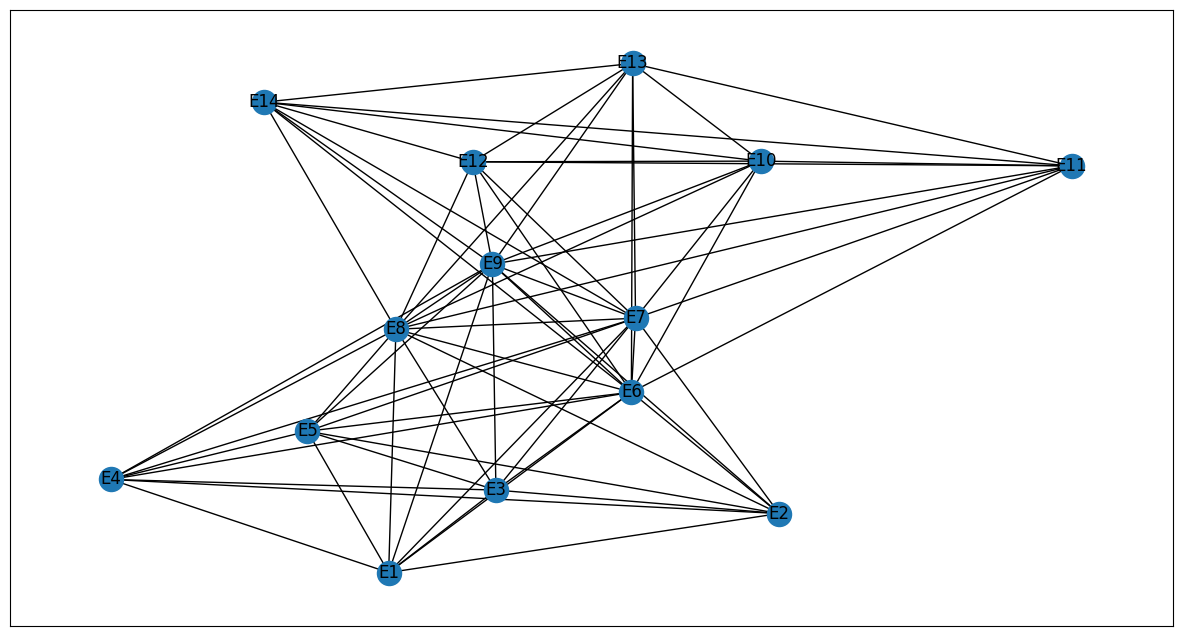

In [71]:
# Visualization of the weighted projection of the events (clubs) network
# - figsize sets the figure size to 15x8 inches.
# - bipartite.weighted_projected_graph() creates a weighted projection onto the club nodes.
# - ratio=False ensures that edge weights reflect the exact number of women shared between events.
# - nx.draw_networkx() draws the network with labels for clarity.

plt.figure(figsize=(15, 8))
C = bipartite.weighted_projected_graph(G, clubs, ratio=False)
nx.draw_networkx(C, with_labels=True)


*Centrality metrics of events network*

In [72]:
print((PTable(C)))

+---------+--------+-------------------+-------------+-----------+-------------+
| Subject | Degree | Degree Centrality | Betweenness | Closeness | Eigenvector |
+---------+--------+-------------------+-------------+-----------+-------------+
|    E9   |   13   |        1.0        |     0.08    |    1.0    |    0.339    |
|    E7   |   13   |        1.0        |     0.08    |    1.0    |    0.339    |
|    E6   |   13   |        1.0        |     0.08    |    1.0    |    0.339    |
|    E8   |   13   |        1.0        |     0.08    |    1.0    |    0.339    |
|    E2   |   8    |       0.615       |     0.0     |   0.722   |    0.232    |
|   E12   |   8    |       0.615       |     0.0     |   0.722   |    0.232    |
|    E3   |   8    |       0.615       |     0.0     |   0.722   |    0.232    |
|    E1   |   8    |       0.615       |     0.0     |   0.722   |    0.232    |
|   E11   |   8    |       0.615       |     0.0     |   0.722   |    0.232    |
|   E10   |   8    |       0

Events **E6, E7, E8, and E9** appear to have strong connections, likely due to the overlapping attendance of women who frequently participated in these gatherings. A select group of women seem to dominate the social scene, forming significantly more connections than others. Notable among them are **T. Anderson, B. Rogers, L. Mandeville, and E. Jefferson**.  

Conversely, some women, such as **E. Nye, O. Carleton, and F. Price**, occupy a more peripheral position in the network, indicating limited participation in social events. Among the clubs, the most popular ones are **E6 through E9**, while **E13 and E14** have the fewest connections, suggesting they attracted fewer participants. Analyzing the broader **Women-Club network**, we observe that **T. Anderson**, the most socially connected woman, is involved in the four most popular clubs. This pattern—where the most socially active women participate in the most popular clubs—is a recurring phenomenon within the network.